In [3]:
import tensorflow as tf
import xarray as xr
import cmweather
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ds = xr.open_mfdataset('mrrpro_data/crocus*20240109*.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:                 (time: 8280, range: 128, sweep: 1, n_spectra: 128,
                             spectrum_n_samples: 64)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 4.41e+03 4.445e+03
  * time                    (time) datetime64[ns] 2024-01-09T00:00:00.0061629...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           (time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    time_coverage_start     (time) |S128 b'2024-01-09T00:00:00Z' ... b'2024-0...
    time_coverage_end       (time) |S128 b'2024-01-09T00:59:50Z' ... b'2024-0...
    time_reference          (time) |S128 b'1970-01-01T00:00:00Z' ... b'1970-0...
    instrument_type         (time) |S128 b'radar' b'radar' ... b'radar' b'radar'
    transfer_function       (time, range) float64 dask.array<chunksize=(360, 128), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 128), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 128), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 128), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 128, 64), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 128, 64), meta=np.ndarray>
    D                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

In [9]:
#ds['spectrum_raw'].sel(time='2023-12-16T15:40:00').isel(n_spectra=15).values
ds = ds.resample(time='60s').mean()

In [10]:
for i in range(len(ds['time'])):
    array = ds['spectrum_raw'].isel(time=i).values[-1::-1, :]
    time_str = ds['time'][i].dt.strftime('%Y%m%d.%H%M%S').values
    fname = '/Users/rjackson/various_notebooks/labelbox_plots/spectra%s.png' % (time_str)
    plt.imsave(fname, array, vmin=-10, vmax=50, cmap='ChaseSpectral')

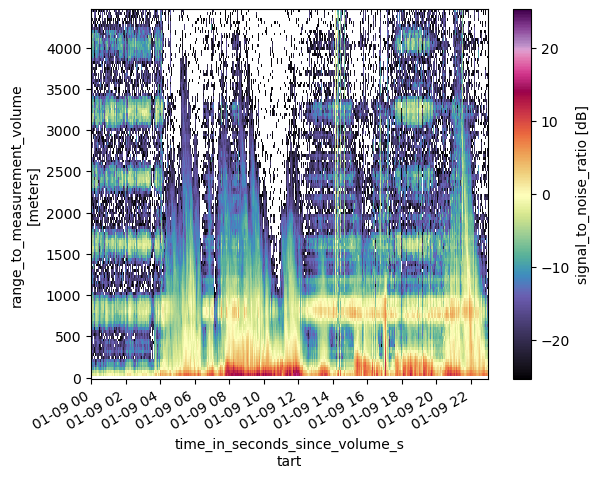

In [81]:
ds['SNR'].T.plot(cmap='ChaseSpectral')